# Movie Recommender System

In [1]:
!pip freeze

alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.11.0
anaconda-navigator==2.4.0
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
anyio @ file:///C:/ci/anyio_1644481921011/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
arrow @ file:///opt/conda/conda-bld/arrow_1649166651673/work
astroid @ file:///C:/Windows/TEMP/abs_b0dtxgpicv/croots/recipe/astroid_1659023126745/work
astropy @ file:///C:/ci/astropy_1657719656942/work
atomicwrites==1.4.0
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.functoo

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

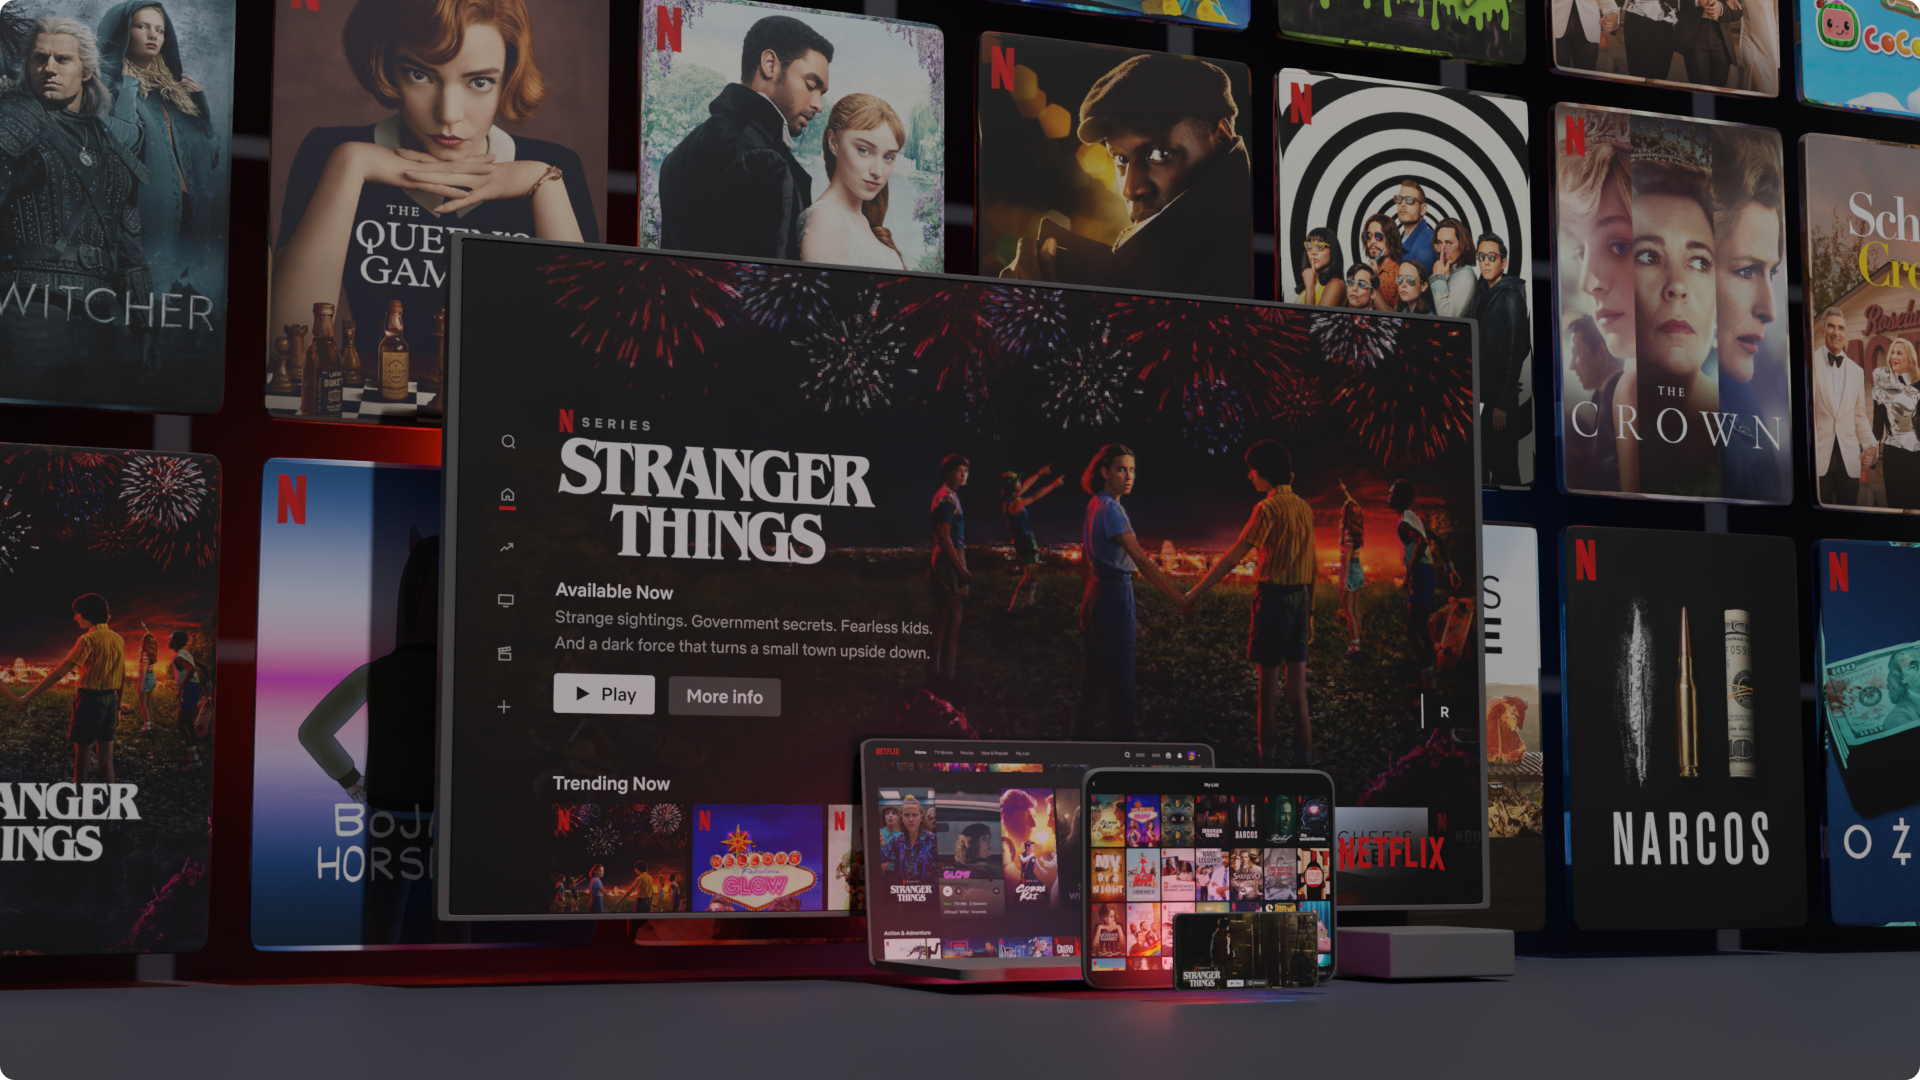

With this context, EA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

What value is achieved through building a functional recommender system?
Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.


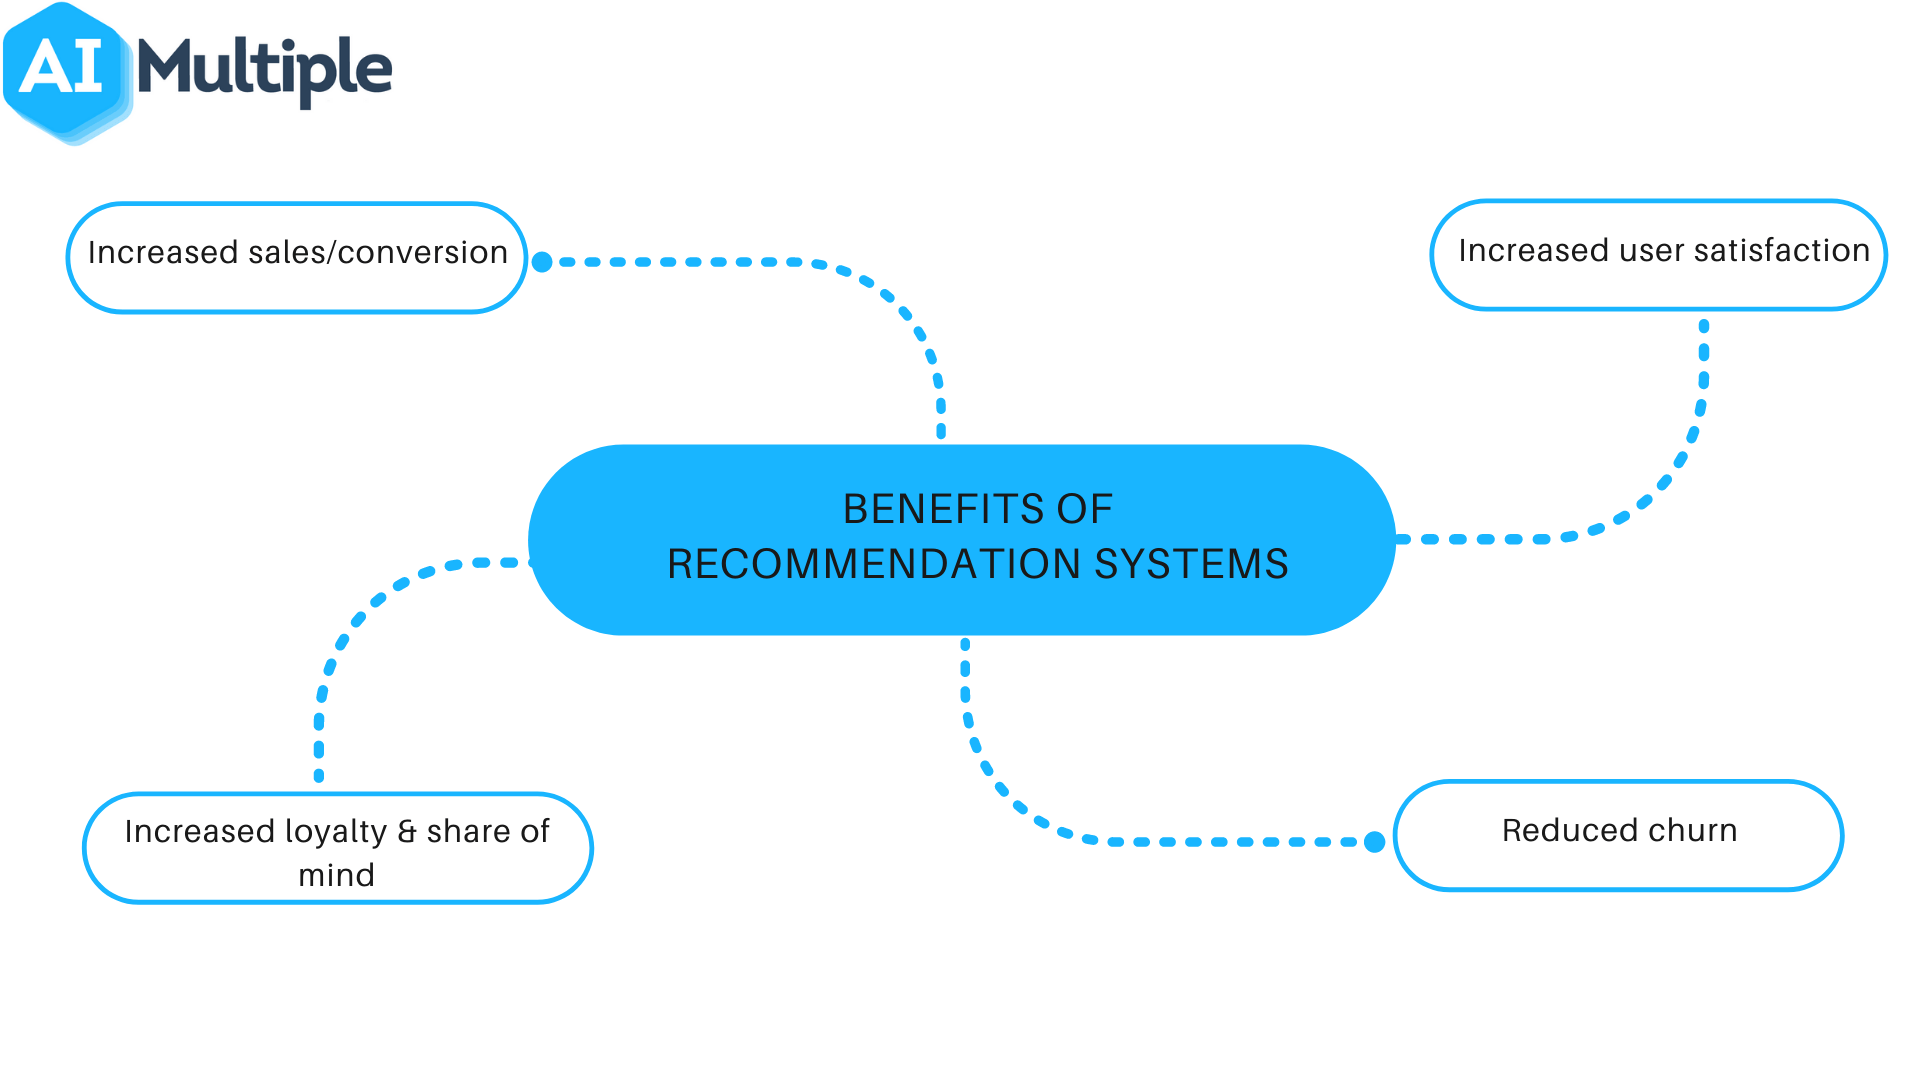

<a id="cont"></a>
## Table of Content

<a href=#one>1. Problem Statement</a>
       
<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)<a>
    
<a href=#five>5. Data Processing</a>

<a href=#six>6. Feature Engineering</a>

<a href=#seven>7. Modelling</a>

<a href=#eight>8. Model Performance</a>

<a href=#nine>9. Saving & Exporting Model</a>

<a href=#ten>10. Conclusion</a>

<a href=#eleven>11. Recommendation</a>

<a href=#ref>Reference Document Links</a>


<a id="one"></a>
# 1. Problem Statement
<a href=#cont>Back to Table of Contents</a>

In this challenge we have been tasked with proudcing an Unsupervised Learning algorithm that can provide personalized movie suggestions to users based on their preferences, ratings, and viewing history.The system should use a combination of collaborative filtering and content-based filtering techniques to generate recommendations, and evaluate the performance of the system using appropriate metrics.

<a id="two"></a>
# 2. Importing packages
<a href=#cont>Back to Table of Contents</a>

In [20]:
# Import our regular old heroes 
import numpy as np
import pandas as pd
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficientcy. 
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

In [3]:
 import sys
for p in sys.path:
        print(p)

C:\Users\PSCadmin\Downloads\ea-movie-recommendation-predict-2023-2024
C:\Users\PSCadmin\anaconda3\python39.zip
C:\Users\PSCadmin\anaconda3\DLLs
C:\Users\PSCadmin\anaconda3\lib
C:\Users\PSCadmin\anaconda3

C:\Users\PSCadmin\anaconda3\lib\site-packages
C:\Users\PSCadmin\anaconda3\lib\site-packages\win32
C:\Users\PSCadmin\anaconda3\lib\site-packages\win32\lib
C:\Users\PSCadmin\anaconda3\lib\site-packages\Pythonwin
C:\Users\PSCadmin\anaconda3\lib\site-packages\IPython\extensions
C:\Users\PSCadmin\.ipython



<a id="three"></a>
# 3. Loading the data
<a href=#cont>Back to Table of Contents</a>

In [4]:
gen_scores = pd.read_csv('C:/Users/PSCadmin/Downloads/ea-movie-recommendation-predict-2023-2024/genome_scores.csv')
gen_tgs = pd.read_csv('C:/Users/PSCadmin/Downloads/ea-movie-recommendation-predict-2023-2024/genome_tags.csv')
imd = pd.read_csv('C:/Users/PSCadmin/Downloads/ea-movie-recommendation-predict-2023-2024/imdb_data.csv')
links = pd.read_csv('C:/Users/PSCadmin/Downloads/ea-movie-recommendation-predict-2023-2024/links.csv')
mvs = pd.read_csv('C:/Users/PSCadmin/Downloads/ea-movie-recommendation-predict-2023-2024/movies.csv')
ss = pd.read_csv('C:/Users/PSCadmin/Downloads/ea-movie-recommendation-predict-2023-2024/sample_submission.csv')
tgs = pd.read_csv('C:/Users/PSCadmin/Downloads/ea-movie-recommendation-predict-2023-2024/tags.csv')
test = pd.read_csv('C:/Users/PSCadmin/Downloads/ea-movie-recommendation-predict-2023-2024/test.csv')
train = pd.read_csv('C:/Users/PSCadmin/Downloads/ea-movie-recommendation-predict-2023-2024/train.csv')

### Description of the Dataset

Data Overview
This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

Source
The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB

Supplied Files
genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
genome_tags.csv - user assigned tags for genome-related scores
imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
sample_submission.csv - Sample of the submission format for the hackathon.
tags.csv - User assigned for the movies within the dataset.
test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.


<a id="four"></a>
# 4. Exploratory Data Analysis
<a href=#cont>Back to Table of Contents</a>

In [5]:
gen_scores.head()


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [6]:
gen_tgs.head()


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [7]:

imd.head()


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [8]:

links.head()


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:

mvs.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:

ss.head()


,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [11]:

tgs.head()


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [12]:

test.head()


,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [13]:

train.head(10000)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
...,...,...,...,...
9995,69529,881,2.0,962600772
9996,20617,1221,5.0,1420561007
9997,136346,2302,3.0,1556676858
9998,85558,50601,3.0,1266171928



<a id="five"></a>
# 5. Date Pre-Processing
<a href=#cont>Back to Table of Contents</a>

In [14]:

file_names = ['gen_scores', 'genome_tags', 'imd', 'links', 'mvs', 'tgs', 'test', 'train']
files = [gen_scores, gen_tgs, imd, links, mvs, tgs, test, train]
for name, file in zip(file_names,files):
    print(name)
    print("Count of Null Values")
    print(file.isnull().sum())

gen_scores
Count of Null Values
movieId      0
tagId        0
relevance    0
dtype: int64
genome_tags
Count of Null Values
tagId    0
tag      0
dtype: int64
imd
Count of Null Values
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
links
Count of Null Values
movieId      0
imdbId       0
tmdbId     107
dtype: int64
mvs
Count of Null Values
movieId    0
title      0
genres     0
dtype: int64
tgs
Count of Null Values
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64
test
Count of Null Values
userId     0
movieId    0
dtype: int64
train
Count of Null Values
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64



<a id="six"></a>
# 6. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

In [15]:
#fill all empty cells of imdb_data with relevant data type
imd['title_cast'] = imd['title_cast'].fillna('')
imd['director'] = imd['director'].fillna('')
imd['runtime'] = imd['runtime'].fillna(0)
imd['budget'] = imd['budget'].fillna('')
imd['plot_keywords'] = imd['plot_keywords'].fillna('')

In [16]:
#fill all empty cells of links with relevant data type
links['tmdbId'] = links['tmdbId'].fillna(0)

In [17]:
#fill all empty cells of tags with relevant data type
tgs['tag'] = tgs['tag'].fillna('')

In [18]:
#split all genres
mvs['genres'] = mvs['genres'].apply(lambda x: ' '.join(x.split('|')))

In [24]:
#extract the year of all movies from title
mvs['year'] = mvs['title'].apply(lambda x: re.findall(r'\((.[\d]+)\)',x))
mvs['year'] = mvs['year'].str[-1]
mvs['year'] = mvs['year'].fillna(0)
mvs['year'] = mvs['year'].astype('int')
mvs.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1995
1,2,Jumanji (1995),Adventure Children Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy Romance,1995
3,4,Waiting to Exhale (1995),Comedy Drama Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [25]:
#split all titles
mvs['title_new'] = mvs['title'].apply(lambda x: x.split('('))
mvs['title_new'] = mvs['title_new'].apply(lambda x: x[0])
mvs.head()

,movieId,title,genres,year,title_new
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1995,Toy Story
1,2,Jumanji (1995),Adventure Children Fantasy,1995,Jumanji
2,3,Grumpier Old Men (1995),Comedy Romance,1995,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy Drama Romance,1995,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II


In [26]:
#split all title_cast in imdb_data
imd['title_cast'] = imd['title_cast'].apply(lambda x: ' '.join(x.split('|')))
#split all plot_keywords in imdb_data
imd['plot_keywords'] = imd['plot_keywords'].apply(lambda x: ' '.join(x.split('|')))

In [27]:
imd.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter,81.0,"$30,000,000",toy rivalry cowboy cgi animation
1,2,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game adventurer fight game
2,3,Walter Matthau Jack Lemmon Sophia Loren Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat lake neighbor rivalry
3,4,Whitney Houston Angela Bassett Loretta Devine ...,Terry McMillan,124.0,"$16,000,000",black american husband wife relationship betra...
4,5,Steve Martin Diane Keaton Martin Short Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood doberman dog mansion



<a id="seven"></a>
# 7. Modelling
<a href=#cont>Back to Table of Contents</a>

In [31]:
# the function to convert from index to title_year
def get_title_year_from_index(index):

      return movies[movies.index == index]['title_year'].values[0]

# the function to convert from title to index
def get_index_from_title(title):

      return movies[movies.title == title].index.values[0]

In [32]:
# create a function to find the closest title
def matching_score(a,b):

      return fuzz.ratio(a, b)

In [33]:
# the function to convert from index to title
def get_title_from_index(index):

      return movies[movies.index == index]['title'].values[0]

In [34]:
# the function to return the most similar title to the words a user types
def find_closest_title(title):

    leven_scores = list(enumerate(movies['title'].apply(matching_score, b=title)))
    sorted_leven_scores = sorted(leven_scores, key=lambda x: x[1], reverse=True)
    closest_title = get_title_from_index(sorted_leven_scores[0][0])
    distance_score = sorted_leven_scores[0][1]

    return closest_title, distance_score

In [35]:
def contents_based_recommender(movie_user_likes, how_many):
    # Get closest Title & Dist. score from Inputed Title
    closest_title, distance_score = find_closest_title(movie_user_likes)

    if distance_score == 100:
        # Get movie idex using declared fuunction
        movie_index = get_index_from_title(closest_title)
        # Apply index to similarity matrix and obtain list of similar movie index
        movie_list = list(enumerate(sim_matrix[int(movie_index)]))
        # Return a list of similar movies
        similar_movies = list(filter(lambda x:x[0] != int(movie_index), 
                                     sorted(movie_list, key=lambda x:x[1], reverse=True))) 
        print('Here\'s the list of movies similar to '+'\033[1m'+str(closest_title)+'\033[0m'+'.\n')
        
        for i, s in similar_movies[: how_many]: print(get_title_year_from_index(i))
    
    else:
        print('Did you mean '+'\033[1m'+str(closest_title)+'\033[0m'+'?','\n')
        movie_index = get_index_from_title(closest_title)
        movie_list = list(enumerate(sim_matrix[int(movie_index)]))
        similar_movies = list(filter(lambda x:x[0] != int(movie_index), 
                                     sorted(movie_list,key=lambda x:x[1], reverse=True)))
        print('Here\'s the list of movies similar to '+'\033[1m'+str(closest_title)+'\033[0m'+'.\n')
        
        for i,s in similar_movies[:how_many]: print(get_title_year_from_index(i))

In [40]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from surprise import Dataset, Reader, SVD, accuracy

# Load the MovieLens 100K dataset
data = Dataset.load_builtin('ml-100k')
# data

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
# trainset, testset

# Build and train a SVD model
model = SVD()
model.fit(trainset)

# Predict the ratings for the test set
predictions = model.test(testset)
# predictions

# Evaluate the model performance using RMSE
rmse = accuracy.rmse(predictions)
print(f'The RMSE of the model is {rmse:.2f}')


ImportError: cannot import name 'Dataset' from 'surprise' (unknown location)